**Table of contents**<a id='toc0_'></a>    
- 1. [Input data](#toc1_)    
- 2. [下游分析](#toc2_)    
  - 2.1. [meta table](#toc2_1_)    
  - 2.2. [otu table](#toc2_2_)    
  - 2.3. [alpha_diversity](#toc2_3_)    
  - 2.4. [beta diversity](#toc2_4_)    
    - 2.4.1. [计算距离](#toc2_4_1_)    
    - 2.4.2. [pcoa](#toc2_4_2_)    
    - 2.4.3. [adonis](#toc2_4_3_)    
    - 2.4.4. [adonis+多重比较](#toc2_4_4_)    
    - 2.4.5. [anosim](#toc2_4_5_)    
    - 2.4.6. [nmds](#toc2_4_6_)    
    - 2.4.7. [Beta diversity difference analysis](#toc2_4_7_)    
  - 2.5. [物种-环境 回归分析](#toc2_5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Input data](#toc0_)

- 物种丰度表

||taxa1|taxa2|taxa3|taxa4|taxa5|
|-|-|-|-|-|-|
|sample1|0|1|2|3|4|
|sample2|0|1|2|3|4|
|sample3|0|1|2|3|4|
|sample4|0|1|2|3|4|
|sample5|0|1|2|3|4|
|sample6|0|1|2|3|4|
|sample7|0|1|2|3|4|

- metadata (分组信息)

||Location|size|
|-|-|-|
|sample1|skin|1|
|sample2|skin|1|
|sample3|skin|2|
|sample4|eye|2|
|sample5|eye|3|
|sample6|eye|3|
|sample7|eye|4|

# 2. <a id='toc2_'></a>[下游分析](#toc0_)

In [2]:
def version(package_name)->None:
    print(f'{package_name.__name__}\t{package_name.__version__}')
    return None

import logging
version(logging)

logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, format='[%(asctime)s - %(levelname)s - %(filename)s:%(lineno)d]\t%(message)s')
logger.info('Start analysis.')

import pandas as pd
version(pd)

import numpy as np
version(np)

import sklearn
version(sklearn)

import statsmodels
version(statsmodels)

import seaborn as sns
version(sns)

import skbio
version(skbio)

import scipy 
version(scipy)

[2024-07-25 17:26:08,844 - INFO - 181010933.py:10]	Start analysis.


logging	0.5.1.2
pandas	2.2.2
numpy	1.26.4
sklearn	1.5.1
statsmodels	0.14.2
seaborn	0.13.2
skbio	0.6.2
scipy	1.13.1


## 2.1. <a id='toc2_1_'></a>[分组信息 meta table](#toc0_)

In [4]:
metadata = pd.read_excel('Datas/metadata v1.0.1.xlsx')
groups = metadata.set_index('sampleID')

logger.info('Print the metatable information')

# print(groups)
groups

[2024-07-25 16:56:27,902 - INFO - <ipython-input-4-dba3a6860789>:4]	Print the metatable information


,Group,Product
sampleID,,
JF.1,JF,21.30
JF.2,JF,16.59
JF.3,JF,19.01
JF.4,JF,19.11
JF.EM.1,JF.EM,79.50
JF.EM.2,JF.EM,76.79
JF.EM.3,JF.EM,70.12
JF.EM.4,JF.EM,75.67
JX.1,JX,23.97


In [5]:
ids = groups.index
# ids = ids.tolist()
len(ids), ids

(24,
 Index(['JF.1', 'JF.2', 'JF.3', 'JF.4', 'JF.EM.1', 'JF.EM.2', 'JF.EM.3',
        'JF.EM.4', 'JX.1', 'JX.2', 'JX.3', 'JX.4', 'JX.EM.1', 'JX.EM.2',
        'JX.EM.3', 'JX.EM.4', 'NR.EM.1', 'NR.EM.2', 'NR.EM.3', 'NR.EM.4',
        'NR.1', 'NR.2', 'NR.3', 'NR.4'],
       dtype='object', name='sampleID'))

## 2.2. <a id='toc2_2_'></a>[otu table](#toc0_)

In [6]:
import pandas as pd

otu = pd.read_excel('Datas/otu_table.o.xlsx')
otu = otu.set_index('sampleID')

logger.info('Print otu table information')

# print(otu.head)
otu

[2024-07-25 16:56:35,177 - INFO - <ipython-input-6-80a0a021638a>:6]	Print otu table information


,unidentified_Gammaproteobacteria,Sphingomonadales,Rhizobiales,Myxococcales,unidentified_Acidobacteria,Gemmatimonadales,Xanthomonadales,Bacillales,unidentified_Alphaproteobacteria,Gaiellales,Others
sampleID,,,,,,,,,,,
JF.1,0.128898,0.071516,0.076328,0.054747,0.047735,0.053092,0.029834,0.028288,0.039787,0.026699,0.443075
JF.2,0.128354,0.074085,0.068750,0.051437,0.049456,0.047735,0.034604,0.024281,0.037239,0.024826,0.459233
JF.3,0.118053,0.070753,0.071842,0.047343,0.050610,0.048193,0.030422,0.035279,0.036999,0.026699,0.463807
JF.4,0.128876,0.073149,0.070340,0.047583,0.052613,0.049804,0.038240,0.022997,0.037522,0.026285,0.452591
JF.EM.1,0.125936,0.079551,0.065287,0.044948,0.050958,0.051111,0.032448,0.021320,0.033101,0.027352,0.467988
JF.EM.2,0.117139,0.078332,0.063132,0.042639,0.049238,0.058014,0.038349,0.019273,0.034299,0.023868,0.475719
JF.EM.3,0.118794,0.076089,0.070492,0.049129,0.047060,0.052940,0.036324,0.023780,0.031468,0.025849,0.468075
JF.EM.4,0.120209,0.087674,0.069229,0.046080,0.049085,0.049673,0.037478,0.021864,0.032470,0.025871,0.460366
JX.1,0.132252,0.058820,0.060627,0.054051,0.050022,0.053201,0.025283,0.021908,0.031402,0.029595,0.482840


In [7]:
data = otu.values   # 只是需要矩阵
data.shape, data

((24, 11),
 array([[0.12889808, 0.07151568, 0.0763284 , 0.05474739, 0.04773519,
         0.05309233, 0.02983449, 0.02828833, 0.03978658, 0.02669861,
         0.44307491],
        [0.12835366, 0.07408537, 0.06875   , 0.05143728, 0.04945558,
         0.04773519, 0.03460366, 0.02428136, 0.03723868, 0.02482578,
         0.45923345],
        [0.11805314, 0.07075348, 0.07184233, 0.04734321, 0.05060976,
         0.04819251, 0.03042247, 0.03527875, 0.03699913, 0.02669861,
         0.46380662],
        [0.12887631, 0.07314896, 0.07033972, 0.04758275, 0.05261324,
         0.04980401, 0.03824042, 0.02299652, 0.03752178, 0.02628484,
         0.45259146],
        [0.12593641, 0.07955139, 0.06528746, 0.04494774, 0.05095819,
         0.05111063, 0.03244773, 0.02131969, 0.03310105, 0.02735192,
         0.4679878 ],
        [0.1171385 , 0.07833188, 0.06313153, 0.04263937, 0.04923781,
         0.05801394, 0.0383493 , 0.01927265, 0.03429878, 0.0238676 ,
         0.47571864],
        [0.11879355, 0.076088

In [8]:
summary = pd.concat([otu, groups], axis=1)

logger.info('Print the summary information.')

summary

[2024-07-25 16:56:42,945 - INFO - <ipython-input-8-50d14e918e8e>:3]	Print the summary information.


,unidentified_Gammaproteobacteria,Sphingomonadales,Rhizobiales,Myxococcales,unidentified_Acidobacteria,Gemmatimonadales,Xanthomonadales,Bacillales,unidentified_Alphaproteobacteria,Gaiellales,Others,Group,Product
JF.1,0.128898,0.071516,0.076328,0.054747,0.047735,0.053092,0.029834,0.028288,0.039787,0.026699,0.443075,JF,21.30
JF.2,0.128354,0.074085,0.068750,0.051437,0.049456,0.047735,0.034604,0.024281,0.037239,0.024826,0.459233,JF,16.59
JF.3,0.118053,0.070753,0.071842,0.047343,0.050610,0.048193,0.030422,0.035279,0.036999,0.026699,0.463807,JF,19.01
JF.4,0.128876,0.073149,0.070340,0.047583,0.052613,0.049804,0.038240,0.022997,0.037522,0.026285,0.452591,JF,19.11
JF.EM.1,0.125936,0.079551,0.065287,0.044948,0.050958,0.051111,0.032448,0.021320,0.033101,0.027352,0.467988,JF.EM,79.50
JF.EM.2,0.117139,0.078332,0.063132,0.042639,0.049238,0.058014,0.038349,0.019273,0.034299,0.023868,0.475719,JF.EM,76.79
JF.EM.3,0.118794,0.076089,0.070492,0.049129,0.047060,0.052940,0.036324,0.023780,0.031468,0.025849,0.468075,JF.EM,70.12
JF.EM.4,0.120209,0.087674,0.069229,0.046080,0.049085,0.049673,0.037478,0.021864,0.032470,0.025871,0.460366,JF.EM,75.67
JX.1,0.132252,0.058820,0.060627,0.054051,0.050022,0.053201,0.025283,0.021908,0.031402,0.029595,0.482840,JX,23.97
JX.2,0.133166,0.068336,0.058907,0.051764,0.047692,0.053267,0.028833,0.020209,0.032861,0.026982,0.477983,JX,23.82


## 2.3. <a id='toc2_3_'></a>[alpha_diversity](#toc0_)

计算所有样品的alpha多样性。

In [7]:
from skbio.diversity import alpha_diversity

alpha_chao1 = alpha_diversity(metric='chao1', counts=data, ids=ids)         # 丰富度
alpha_simpson_e = alpha_diversity(metric='simpson_e', counts=data, ids=ids)         # 均匀度
alpha_simpson = alpha_diversity(metric='simpson', counts=data, ids=ids)     # 多样性
alpha_shannon = alpha_diversity(metric='shannon', counts=data, ids=ids)     # 多样性

logger.info('Alpha diversity analysis.')

summary['alpha_chao1'] = alpha_chao1
summary['alpha_simpson_e'] = alpha_simpson_e
summary['alpha_simpson'] = alpha_simpson
summary['alpha_shannon'] = alpha_shannon

summary

[2024-07-25 16:49:47,018 - INFO - 2848436887.py:8]	Alpha diversity analysis.


,unidentified_Gammaproteobacteria,Sphingomonadales,Rhizobiales,Myxococcales,unidentified_Acidobacteria,Gemmatimonadales,Xanthomonadales,Bacillales,unidentified_Alphaproteobacteria,Gaiellales,Others,Group,Product,alpha_chao1,alpha_simpson_e,alpha_simpson,alpha_shannon
sampleID,,,,,,,,,,,,,,,,,
JF.1,0.128898,0.071516,0.076328,0.054747,0.047735,0.053092,0.029834,0.028288,0.039787,0.026699,0.443075,JF,21.30,11.0,0.385287,0.764049,1.900539
JF.2,0.128354,0.074085,0.068750,0.051437,0.049456,0.047735,0.034604,0.024281,0.037239,0.024826,0.459233,JF,16.59,11.0,0.365470,0.751254,1.865261
JF.3,0.118053,0.070753,0.071842,0.047343,0.050610,0.048193,0.030422,0.035279,0.036999,0.026699,0.463807,JF,19.01,11.0,0.362769,0.749402,1.869661
JF.4,0.128876,0.073149,0.070340,0.047583,0.052613,0.049804,0.038240,0.022997,0.037522,0.026285,0.452591,JF,19.11,11.0,0.373575,0.756651,1.880487
JF.EM.1,0.125936,0.079551,0.065287,0.044948,0.050958,0.051111,0.032448,0.021320,0.033101,0.027352,0.467988,JF.EM,79.50,11.0,0.355053,0.743956,1.843475
JF.EM.2,0.117139,0.078332,0.063132,0.042639,0.049238,0.058014,0.038349,0.019273,0.034299,0.023868,0.475719,JF.EM,76.79,11.0,0.347848,0.738653,1.832467
JF.EM.3,0.118794,0.076089,0.070492,0.049129,0.047060,0.052940,0.036324,0.023780,0.031468,0.025849,0.468075,JF.EM,70.12,11.0,0.356592,0.745061,1.851469
JF.EM.4,0.120209,0.087674,0.069229,0.046080,0.049085,0.049673,0.037478,0.021864,0.032470,0.025871,0.460366,JF.EM,75.67,11.0,0.364405,0.750527,1.861454
JX.1,0.132252,0.058820,0.060627,0.054051,0.050022,0.053201,0.025283,0.021908,0.031402,0.029595,0.482840,JX,23.97,11.0,0.337958,0.731005,1.808847


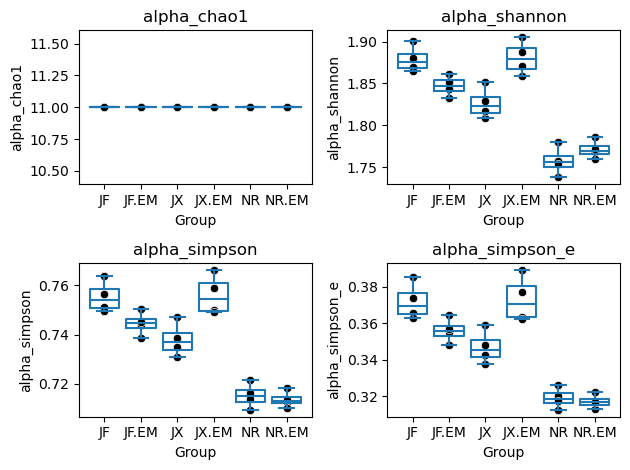

In [8]:
import matplotlib.pyplot as plt  

fig = plt.figure()
alpha_diversity_list = ['alpha_chao1', 'alpha_shannon', 'alpha_simpson', 'alpha_simpson_e']

for ax_num, alpha_index in enumerate(alpha_diversity_list):
    ax = plt.subplot(2,2,ax_num+1)
    sns.boxplot(data=summary, x='Group', y=alpha_index, fill=False, ax=ax).set(title=f'{alpha_index}')
    sns.scatterplot(data=summary, x='Group', y=alpha_index, c='black', ax=ax)
fig.tight_layout()

更具分组进行差异显著性分析。

In [9]:
# def Pvalue2asterisks(Pvalue:float):
#     if Pvalue < 0.0001:
#         return '****'
#     elif Pvalue < 0.001:
#         return '***'
#     elif Pvalue < 0.01:
#         return '**'
#     elif Pvalue < 0.05:
#         return '*'
#     return 'ns'

# # 差异显著性分析
# from scipy.stats import f_oneway

# Fvalue, Pvalue = f_oneway()

## 2.4. <a id='toc2_4_'></a>[beta diversity](#toc0_)
### 2.4.1. <a id='toc2_4_1_'></a>[计算距离](#toc0_)

- braycurtis: 不依赖于otu之间的进化距离

[2024-07-25 16:49:47,761 - INFO - 2905347531.py:5]	Beta diversity analysis.


24x24 distance matrix
IDs:
'JF.1', 'JF.2', 'JF.3', 'JF.4', 'JF.EM.1', 'JF.EM.2', 'JF.EM.3', 'JF.EM.4', ...
Data:
[[0.         0.02521777 0.03118467 0.0244338  0.03943815 0.05439895
  0.03606272 0.04244338 0.04841028 0.03963415 0.03950348 0.0315331
  0.02985627 0.04451219 0.03432056 0.02378049 0.08880662 0.08900261
  0.08046603 0.0804878  0.08523519 0.078027   0.07926829 0.0639155 ]
 [0.02521777 0.         0.02214721 0.01271777 0.02162457 0.0347561
  0.02053571 0.02105836 0.04091899 0.03157666 0.02543554 0.0197953
  0.02939895 0.03671603 0.03719512 0.01263066 0.08547474 0.08414634
  0.071777   0.07384582 0.07844077 0.07506533 0.07247387 0.05346254]
 [0.03118467 0.02214721 0.         0.02541376 0.02680749 0.03723868
  0.02277874 0.02761324 0.04784408 0.03906794 0.03035714 0.02695993
  0.03027003 0.02184233 0.04414199 0.02347561 0.07051394 0.07212544
  0.05727352 0.06293554 0.08477787 0.07887631 0.0796385  0.05354965]
 [0.0244338  0.01271777 0.02541376 0.         0.02417248 0.03662892
  0

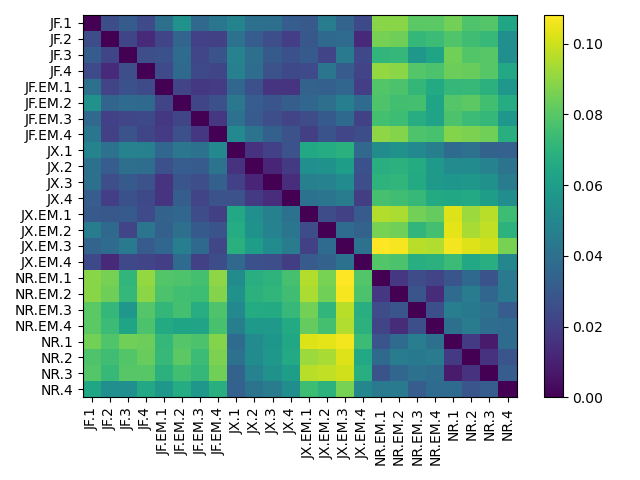

In [10]:
from skbio.diversity import beta_diversity

beta_bc = beta_diversity(metric="braycurtis", counts=data, ids=ids)

logger.info('Beta diversity analysis.')

print(beta_bc)
beta_bc

### 2.4.2. <a id='toc2_4_2_'></a>[pcoa](#toc0_)

[2024-07-25 16:49:48,317 - INFO - 3475660558.py:3]	PcoA analysis.


Ordination results:
	Method: Principal Coordinate Analysis (PCoA)
	Eigvals: 3
	Proportion explained: 3
	Features: N/A
	Samples: 24x3
	Biplot Scores: N/A
	Sample constraints: N/A
	Feature IDs: N/A
	Sample IDs: 'JF.1', 'JF.2', 'JF.3', 'JF.4', 'JF.EM.1', 'JF.EM.2', 'JF.EM.3', 'JF.EM.4', ...


d:\ProgramFiles\miniconda3\envs\skbio\Lib\site-packages\skbio\stats\ordination\_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.001669204263157296 and the largest is 0.028415342209581702.
  warn(


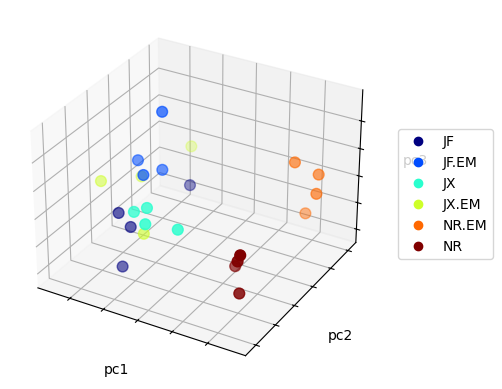

In [11]:
from skbio.stats.ordination import pcoa

logger.info('PcoA analysis.')

beta_diversity_pcoa = pcoa(distance_matrix=beta_bc, number_of_dimensions=3)
print(beta_diversity_pcoa)
figure = beta_diversity_pcoa.plot(df=groups, column='Group', axis_labels=('pc1', 'pc2', 'pc3'), cmap='jet', s=60)
# figure.tight_layout()

In [12]:
beta_diversity_pcoa.samples

,PC1,PC2,PC3
JF.1,-0.027954,-0.009717,-0.021548
JF.2,-0.025155,-0.007692,-0.007661
JF.3,-0.020336,0.017819,-0.007496
JF.4,-0.031427,-0.008304,-0.003272
JF.EM.1,-0.020472,-0.004985,0.010349
JF.EM.2,-0.020114,0.004045,0.027492
JF.EM.3,-0.020804,0.004390,0.006399
JF.EM.4,-0.033774,0.003142,0.008388
JX.1,0.012785,-0.016170,0.004049
JX.2,-0.001860,-0.019338,0.005291


In [13]:
# 提取PCoA坐标
coords = beta_diversity_pcoa.samples

summary = pd.concat([summary, beta_diversity_pcoa.samples], axis=1)
summary

,unidentified_Gammaproteobacteria,Sphingomonadales,Rhizobiales,Myxococcales,unidentified_Acidobacteria,Gemmatimonadales,Xanthomonadales,Bacillales,unidentified_Alphaproteobacteria,Gaiellales,Others,Group,Product,alpha_chao1,alpha_simpson_e,alpha_simpson,alpha_shannon,PC1,PC2,PC3
JF.1,0.128898,0.071516,0.076328,0.054747,0.047735,0.053092,0.029834,0.028288,0.039787,0.026699,0.443075,JF,21.30,11.0,0.385287,0.764049,1.900539,-0.027954,-0.009717,-0.021548
JF.2,0.128354,0.074085,0.068750,0.051437,0.049456,0.047735,0.034604,0.024281,0.037239,0.024826,0.459233,JF,16.59,11.0,0.365470,0.751254,1.865261,-0.025155,-0.007692,-0.007661
JF.3,0.118053,0.070753,0.071842,0.047343,0.050610,0.048193,0.030422,0.035279,0.036999,0.026699,0.463807,JF,19.01,11.0,0.362769,0.749402,1.869661,-0.020336,0.017819,-0.007496
JF.4,0.128876,0.073149,0.070340,0.047583,0.052613,0.049804,0.038240,0.022997,0.037522,0.026285,0.452591,JF,19.11,11.0,0.373575,0.756651,1.880487,-0.031427,-0.008304,-0.003272
JF.EM.1,0.125936,0.079551,0.065287,0.044948,0.050958,0.051111,0.032448,0.021320,0.033101,0.027352,0.467988,JF.EM,79.50,11.0,0.355053,0.743956,1.843475,-0.020472,-0.004985,0.010349
JF.EM.2,0.117139,0.078332,0.063132,0.042639,0.049238,0.058014,0.038349,0.019273,0.034299,0.023868,0.475719,JF.EM,76.79,11.0,0.347848,0.738653,1.832467,-0.020114,0.004045,0.027492
JF.EM.3,0.118794,0.076089,0.070492,0.049129,0.047060,0.052940,0.036324,0.023780,0.031468,0.025849,0.468075,JF.EM,70.12,11.0,0.356592,0.745061,1.851469,-0.020804,0.004390,0.006399
JF.EM.4,0.120209,0.087674,0.069229,0.046080,0.049085,0.049673,0.037478,0.021864,0.032470,0.025871,0.460366,JF.EM,75.67,11.0,0.364405,0.750527,1.861454,-0.033774,0.003142,0.008388
JX.1,0.132252,0.058820,0.060627,0.054051,0.050022,0.053201,0.025283,0.021908,0.031402,0.029595,0.482840,JX,23.97,11.0,0.337958,0.731005,1.808847,0.012785,-0.016170,0.004049
JX.2,0.133166,0.068336,0.058907,0.051764,0.047692,0.053267,0.028833,0.020209,0.032861,0.026982,0.477983,JX,23.82,11.0,0.342820,0.734820,1.816912,-0.001860,-0.019338,0.005291


C:\Users\zhao\AppData\Local\Temp\ipykernel_25612\638237651.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(summary['PC1'][i], summary['PC2'][i], id, fontsize=7.5)


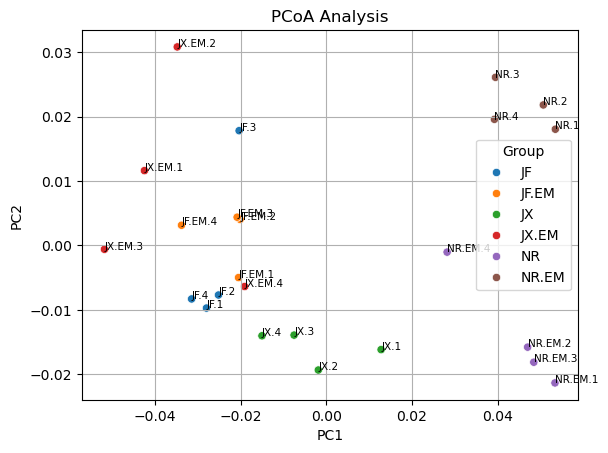

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化PCoA结果
plt.figure()
# plt.scatter(coords['PC1'], coords['PC2'], c='red')
sns.scatterplot(data=summary, x='PC1', y='PC2', hue='Group')

for i, id in enumerate(ids):
    plt.text(summary['PC1'][i], summary['PC2'][i], id, fontsize=7.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCoA Analysis')
plt.grid(True)
plt.show()

### 2.4.3. <a id='toc2_4_3_'></a>[adonis](#toc0_)

In [15]:
from skbio.stats.distance import permanova

logger.info('skbio adonis analysis.')

adonis = permanova(distance_matrix=beta_bc, grouping=groups, column='Group', permutations=999)
adonis

[2024-07-25 16:49:48,792 - INFO - 3180379690.py:3]	skbio adonis analysis.


method name               PERMANOVA
test statistic name        pseudo-F
sample size                      24
number of groups                  6
test statistic            21.542018
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object

### 2.4.4. <a id='toc2_4_4_'></a>[adonis+多重比较](#toc0_)

In [11]:
# 切换：conda activate adonis
# python=3.6.13 scipy才能正常支持PyPerMANOVA

from PyPerMANOVA.PyPerMANOVA import permutational_analysis

logger.info('Start PyPerMANOVA analysis.')

permanova_result, posthoc_result = permutational_analysis(
    data=otu, 
    mapping=groups, 
    column='Group', 
    by= 'row', 
    norm = None, 
    metric='braycurtis', 
    permutations=999
)
display(permanova_result)
display(posthoc_result)
logger.info(f'OK')

logger.info('jx vs nr')

[2024-07-25 17:02:25,057 - INFO - <ipython-input-11-a828a9e62c9c>:6]	Start PyPerMANOVA analysis.
[2024-07-25 17:02:25,058 - INFO - PyPerMANOVA.py:654]	正在调用PyPerMANOVA包


,Pval,eta-sqr,F
0,0.001,0.856813,21.542018


,A,B,Pval,bonf,eta-sqr,cohen-d,F,t,dof
0,JF,JF.EM,0.030,0.450,0.459721,1.863970,5.105377,2.259508,5.877735789511668
1,JF,JX,0.030,0.450,0.574283,2.399452,8.093886,2.844976,5.623323344135069
2,JF,JX.EM,0.169,2.535,0.246062,1.185496,1.958214,1.399362,5.57339634830572
3,JF,NR,0.032,0.480,0.877073,5.357047,42.809519,6.542898,5.966909047830072
4,JF,NR.EM,0.028,0.420,0.850233,4.770079,34.062103,5.836275,5.987978897442324
5,JF.EM,JX,0.030,0.450,0.563761,2.289655,7.753917,2.784586,5.916177585774885
6,JF.EM,JX.EM,0.067,1.005,0.281483,1.350452,2.350529,1.533144,5.155460473561868
7,JF.EM,NR,0.041,0.615,0.882654,5.498793,45.130691,6.717938,5.970314291669328
8,JF.EM,NR.EM,0.028,0.420,0.863953,5.128126,38.102422,6.172716,5.79555773116548
9,JX,JX.EM,0.040,0.600,0.645888,3.019542,10.943809,3.308143,4.801162429157207


[2024-07-25 17:02:42,698 - INFO - <ipython-input-11-a828a9e62c9c>:19]	OK
[2024-07-25 17:02:42,699 - INFO - <ipython-input-11-a828a9e62c9c>:21]	jx vs nr


In [27]:
groups_jfnr = pd.concat([groups[0:8], groups[16:]], axis=0)
otu_jfnr = pd.concat([otu[0:8], otu[16:]], axis=0)

permanova_result, posthoc_result = permutational_analysis(
    data=otu_jfnr, 
    mapping=groups_jfnr, 
    column='Group', 
    by= 'row', 
    norm = None, 
    metric='braycurtis', 
    permutations=999
)
display(permanova_result)
display(posthoc_result)


[2024-07-25 17:08:41,472 - INFO - PyPerMANOVA.py:654]	正在调用PyPerMANOVA包


,Pval,eta-sqr,F
0,0.001,0.877326,28.60664


,A,B,Pval,bonf,eta-sqr,cohen-d,F,t,dof
0,JF,JF.EM,0.035,0.210,0.459721,1.863970,5.105377,2.259508,5.877735789511668
1,JF,NR,0.029,0.174,0.877073,5.357047,42.809519,6.542898,5.966909047830072
2,JF,NR.EM,0.032,0.192,0.850233,4.770079,34.062103,5.836275,5.987978897442324
3,JF.EM,NR,0.035,0.210,0.882654,5.498793,45.130691,6.717938,5.970314291669328
4,JF.EM,NR.EM,0.035,0.210,0.863953,5.128126,38.102422,6.172716,5.79555773116548
5,NR,NR.EM,0.026,0.156,0.562278,2.282725,7.707332,2.776208,5.916388778518587


In [29]:
groups[8:16]

,Group,Product
sampleID,,
JX.1,JX,23.97
JX.2,JX,23.82
JX.3,JX,29.34
JX.4,JX,26.58
JX.EM.1,JX.EM,98.90
JX.EM.2,JX.EM,114.56
JX.EM.3,JX.EM,88.47
JX.EM.4,JX.EM,101.03


In [30]:
groups_jxnr = pd.concat([groups[8:16], groups[16:]], axis=0)
otu_jxnr = pd.concat([otu[8:16], otu[16:]], axis=0)

permanova_result, posthoc_result = permutational_analysis(
    data=otu_jxnr, 
    mapping=groups_jxnr, 
    column='Group', 
    by= 'row', 
    norm = None, 
    metric='braycurtis', 
    permutations=999
)
display(permanova_result)
display(posthoc_result)


[2024-07-25 17:11:08,906 - INFO - PyPerMANOVA.py:654]	正在调用PyPerMANOVA包


,Pval,eta-sqr,F
0,0.001,0.859037,24.376314


,A,B,Pval,bonf,eta-sqr,cohen-d,F,t,dof
0,JX,JX.EM,0.026,0.156,0.645888,3.019542,10.943809,3.308143,4.801162429157207
1,JX,NR,0.019,0.114,0.857068,4.983248,35.977979,5.998165,5.795244506443557
2,JX,NR.EM,0.036,0.216,0.747177,3.589739,17.731979,4.210936,5.50416560815674
3,JX.EM,NR,0.030,0.180,0.857795,5.194658,36.192689,6.016036,5.364964848383355
4,JX.EM,NR.EM,0.037,0.222,0.850023,4.890835,34.006117,5.831476,5.686577386732764
5,NR,NR.EM,0.024,0.144,0.562278,2.282725,7.707332,2.776208,5.916388778518587


### 2.4.5. <a id='toc2_4_5_'></a>[anosim](#toc0_)

In [17]:
from skbio.stats.distance import anosim 

logger.info('start anosim analysis from skbio package')

anosim_results = anosim(distance_matrix=beta_bc, grouping=groups, column='Group', permutations=999)
anosim_results

[2024-07-25 16:49:48,894 - INFO - 39398129.py:3]	start anosim analysis from skbio package


method name                 ANOSIM
test statistic name              R
sample size                     24
number of groups                 6
test statistic            0.813426
p-value                      0.001
number of permutations         999
Name: ANOSIM results, dtype: object

### 2.4.6. <a id='toc2_4_6_'></a>[nmds](#toc0_)

[2024-07-25 16:49:49,171 - INFO - 1485985896.py:6]	start nmds analysis from sklearn package


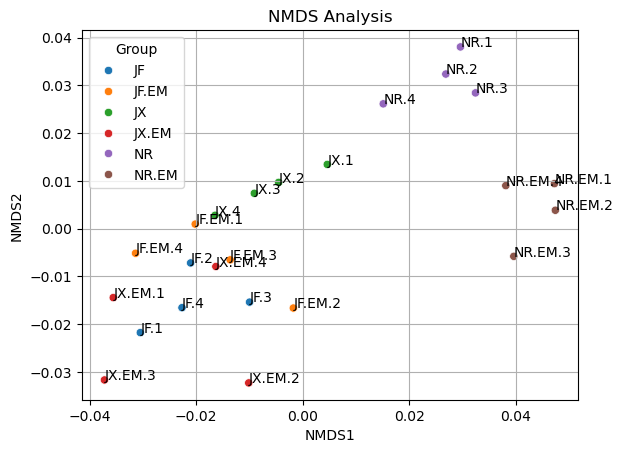

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

logger.info('start nmds analysis from sklearn package')

# # 示例数据，原始数据矩阵
# data = np.array([
#     [1, 2, 3],
#     [2, 3, 4],
#     [3, 4, 5],
#     [4, 5, 6]
# ])

# # 样本ID
# ids = ['sample1', 'sample2', 'sample3', 'sample4']

# 计算欧氏距离矩阵
dist_matrix = euclidean_distances(data)

# 进行NMDS分析
nmds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
nmds_coords = nmds.fit_transform(dist_matrix)

summary = pd.concat([summary, pd.DataFrame(data=nmds_coords, columns=['nmds1', 'nmds2'], index=ids)], axis=1)

logger.debug(summary)

# 可视化NMDS结果
plt.figure()
# plt.scatter(nmds_coords[:, 0], nmds_coords[:, 1], c='red', edgecolor='k')
sns.scatterplot(data=summary, x='nmds1', y='nmds2', hue='Group')

for i, id in enumerate(ids):
    plt.text(nmds_coords[i, 0], nmds_coords[i, 1], id)

plt.xlabel('NMDS1')
plt.ylabel('NMDS2')
plt.title('NMDS Analysis')
plt.grid(True)
plt.show()

### 2.4.7. <a id='toc2_4_7_'></a>[Beta diversity difference analysis](#toc0_)

In [19]:
beta_bc.to_data_frame()

,JF.1,JF.2,JF.3,JF.4,JF.EM.1,JF.EM.2,JF.EM.3,JF.EM.4,JX.1,JX.2,...,JX.EM.3,JX.EM.4,NR.EM.1,NR.EM.2,NR.EM.3,NR.EM.4,NR.1,NR.2,NR.3,NR.4
JF.1,0.000000,0.025218,0.031185,0.024434,0.039438,0.054399,0.036063,0.042443,0.048410,0.039634,...,0.034321,0.023780,0.088807,0.089003,0.080466,0.080488,0.085235,0.078027,0.079268,0.063916
JF.2,0.025218,0.000000,0.022147,0.012718,0.021625,0.034756,0.020536,0.021058,0.040919,0.031577,...,0.037195,0.012631,0.085475,0.084146,0.071777,0.073846,0.078441,0.075065,0.072474,0.053463
JF.3,0.031185,0.022147,0.000000,0.025414,0.026807,0.037239,0.022779,0.027613,0.047844,0.039068,...,0.044142,0.023476,0.070514,0.072125,0.057274,0.062936,0.084778,0.078876,0.079639,0.053550
JF.4,0.024434,0.012718,0.025414,0.000000,0.024172,0.036629,0.024042,0.022300,0.046799,0.038023,...,0.030444,0.021821,0.090571,0.089242,0.078942,0.077548,0.083645,0.082796,0.079682,0.064699
JF.EM.1,0.039438,0.021625,0.026807,0.024172,0.000000,0.021733,0.017639,0.018772,0.035192,0.026198,...,0.035497,0.019643,0.078767,0.077439,0.071603,0.065745,0.071799,0.072278,0.069164,0.057753
JF.EM.2,0.054399,0.034756,0.037239,0.036629,0.021733,0.000000,0.021995,0.026546,0.042792,0.031468,...,0.045645,0.037239,0.077918,0.075501,0.075588,0.063132,0.079268,0.080771,0.075327,0.066311
JF.EM.3,0.036063,0.020536,0.022779,0.024042,0.017639,0.021995,0.000000,0.017204,0.040113,0.030401,...,0.036476,0.020884,0.075610,0.074281,0.067117,0.062587,0.077635,0.073780,0.071973,0.057143
JF.EM.4,0.042443,0.021058,0.027613,0.022300,0.018772,0.026546,0.017204,0.000000,0.050719,0.041355,...,0.022648,0.024956,0.089503,0.088175,0.077744,0.076481,0.088197,0.086868,0.084451,0.068227
JX.1,0.048410,0.040919,0.047844,0.046799,0.035192,0.042792,0.040113,0.050719,0.000000,0.015505,...,0.068576,0.036106,0.052134,0.054421,0.050719,0.046341,0.037522,0.039743,0.033972,0.033036
JX.2,0.039634,0.031577,0.039068,0.038023,0.026198,0.031468,0.030401,0.041355,0.015505,0.000000,...,0.059604,0.026982,0.067574,0.069033,0.065919,0.058275,0.051220,0.051764,0.047953,0.041202


## 2.5. <a id='toc2_5_'></a>[物种-环境 回归分析](#toc0_)

- α多样性指数-环境

In [20]:
summary

,unidentified_Gammaproteobacteria,Sphingomonadales,Rhizobiales,Myxococcales,unidentified_Acidobacteria,Gemmatimonadales,Xanthomonadales,Bacillales,unidentified_Alphaproteobacteria,Gaiellales,...,Product,alpha_chao1,alpha_simpson_e,alpha_simpson,alpha_shannon,PC1,PC2,PC3,nmds1,nmds2
JF.1,0.128898,0.071516,0.076328,0.054747,0.047735,0.053092,0.029834,0.028288,0.039787,0.026699,...,21.30,11.0,0.385287,0.764049,1.900539,-0.027954,-0.009717,-0.021548,-0.030506,-0.021774
JF.2,0.128354,0.074085,0.068750,0.051437,0.049456,0.047735,0.034604,0.024281,0.037239,0.024826,...,16.59,11.0,0.365470,0.751254,1.865261,-0.025155,-0.007692,-0.007661,-0.021068,-0.007192
JF.3,0.118053,0.070753,0.071842,0.047343,0.050610,0.048193,0.030422,0.035279,0.036999,0.026699,...,19.01,11.0,0.362769,0.749402,1.869661,-0.020336,0.017819,-0.007496,-0.010005,-0.015394
JF.4,0.128876,0.073149,0.070340,0.047583,0.052613,0.049804,0.038240,0.022997,0.037522,0.026285,...,19.11,11.0,0.373575,0.756651,1.880487,-0.031427,-0.008304,-0.003272,-0.022686,-0.016558
JF.EM.1,0.125936,0.079551,0.065287,0.044948,0.050958,0.051111,0.032448,0.021320,0.033101,0.027352,...,79.50,11.0,0.355053,0.743956,1.843475,-0.020472,-0.004985,0.010349,-0.020201,0.000940
JF.EM.2,0.117139,0.078332,0.063132,0.042639,0.049238,0.058014,0.038349,0.019273,0.034299,0.023868,...,76.79,11.0,0.347848,0.738653,1.832467,-0.020114,0.004045,0.027492,-0.001790,-0.016632
JF.EM.3,0.118794,0.076089,0.070492,0.049129,0.047060,0.052940,0.036324,0.023780,0.031468,0.025849,...,70.12,11.0,0.356592,0.745061,1.851469,-0.020804,0.004390,0.006399,-0.013644,-0.006545
JF.EM.4,0.120209,0.087674,0.069229,0.046080,0.049085,0.049673,0.037478,0.021864,0.032470,0.025871,...,75.67,11.0,0.364405,0.750527,1.861454,-0.033774,0.003142,0.008388,-0.031402,-0.005163
JX.1,0.132252,0.058820,0.060627,0.054051,0.050022,0.053201,0.025283,0.021908,0.031402,0.029595,...,23.97,11.0,0.337958,0.731005,1.808847,0.012785,-0.016170,0.004049,0.004585,0.013438
JX.2,0.133166,0.068336,0.058907,0.051764,0.047692,0.053267,0.028833,0.020209,0.032861,0.026982,...,23.82,11.0,0.342820,0.734820,1.816912,-0.001860,-0.019338,0.005291,-0.004542,0.009677


In [21]:
total = summary[0:16]  # del NR NR.EM
total

,unidentified_Gammaproteobacteria,Sphingomonadales,Rhizobiales,Myxococcales,unidentified_Acidobacteria,Gemmatimonadales,Xanthomonadales,Bacillales,unidentified_Alphaproteobacteria,Gaiellales,...,Product,alpha_chao1,alpha_simpson_e,alpha_simpson,alpha_shannon,PC1,PC2,PC3,nmds1,nmds2
JF.1,0.128898,0.071516,0.076328,0.054747,0.047735,0.053092,0.029834,0.028288,0.039787,0.026699,...,21.30,11.0,0.385287,0.764049,1.900539,-0.027954,-0.009717,-0.021548,-0.030506,-0.021774
JF.2,0.128354,0.074085,0.068750,0.051437,0.049456,0.047735,0.034604,0.024281,0.037239,0.024826,...,16.59,11.0,0.365470,0.751254,1.865261,-0.025155,-0.007692,-0.007661,-0.021068,-0.007192
JF.3,0.118053,0.070753,0.071842,0.047343,0.050610,0.048193,0.030422,0.035279,0.036999,0.026699,...,19.01,11.0,0.362769,0.749402,1.869661,-0.020336,0.017819,-0.007496,-0.010005,-0.015394
JF.4,0.128876,0.073149,0.070340,0.047583,0.052613,0.049804,0.038240,0.022997,0.037522,0.026285,...,19.11,11.0,0.373575,0.756651,1.880487,-0.031427,-0.008304,-0.003272,-0.022686,-0.016558
JF.EM.1,0.125936,0.079551,0.065287,0.044948,0.050958,0.051111,0.032448,0.021320,0.033101,0.027352,...,79.50,11.0,0.355053,0.743956,1.843475,-0.020472,-0.004985,0.010349,-0.020201,0.000940
JF.EM.2,0.117139,0.078332,0.063132,0.042639,0.049238,0.058014,0.038349,0.019273,0.034299,0.023868,...,76.79,11.0,0.347848,0.738653,1.832467,-0.020114,0.004045,0.027492,-0.001790,-0.016632
JF.EM.3,0.118794,0.076089,0.070492,0.049129,0.047060,0.052940,0.036324,0.023780,0.031468,0.025849,...,70.12,11.0,0.356592,0.745061,1.851469,-0.020804,0.004390,0.006399,-0.013644,-0.006545
JF.EM.4,0.120209,0.087674,0.069229,0.046080,0.049085,0.049673,0.037478,0.021864,0.032470,0.025871,...,75.67,11.0,0.364405,0.750527,1.861454,-0.033774,0.003142,0.008388,-0.031402,-0.005163
JX.1,0.132252,0.058820,0.060627,0.054051,0.050022,0.053201,0.025283,0.021908,0.031402,0.029595,...,23.97,11.0,0.337958,0.731005,1.808847,0.012785,-0.016170,0.004049,0.004585,0.013438
JX.2,0.133166,0.068336,0.058907,0.051764,0.047692,0.053267,0.028833,0.020209,0.032861,0.026982,...,23.82,11.0,0.342820,0.734820,1.816912,-0.001860,-0.019338,0.005291,-0.004542,0.009677


In [22]:
from scipy.stats import pearsonr 
from scipy.stats import spearmanr 

# pearson_value = pearsonr(total['Product'], total['Sphingobium'])
# spearman_value = spearmanr(total['Product'], total['Sphingobium'])

# bac = total.columns[:10]    # 只取菌
# for i in bac:
#     pearson_value = pearsonr(total['Product'], total[i])
#     spearman_value = spearmanr(total['Product'], total[i])
#     print(f'{i}\tpearson:{pearson_value[0]}\t{pearson_value[1]}\tspearman:{spearman_value[0]}\t{spearman_value[1]}')

C:\Users\zhao\AppData\Local\Temp\ipykernel_25612\1849191565.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sns.scatterplot(data=total, x=bac_name, y='Product', hue='Group', ax=ax).set(title=f'p={model.pvalues[1]}, R2={model.rsquared}')
C:\Users\zhao\AppData\Local\Temp\ipykernel_25612\1849191565.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sns.scatterplot(data=total, x=bac_name, y='Product', hue='Group', ax=ax).set(title=f'p={model.pvalues[1]}, R2={model.rsquared}')
C:\Users\zhao\AppData\Local\Temp\ipykernel_25612\1849191565.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecate

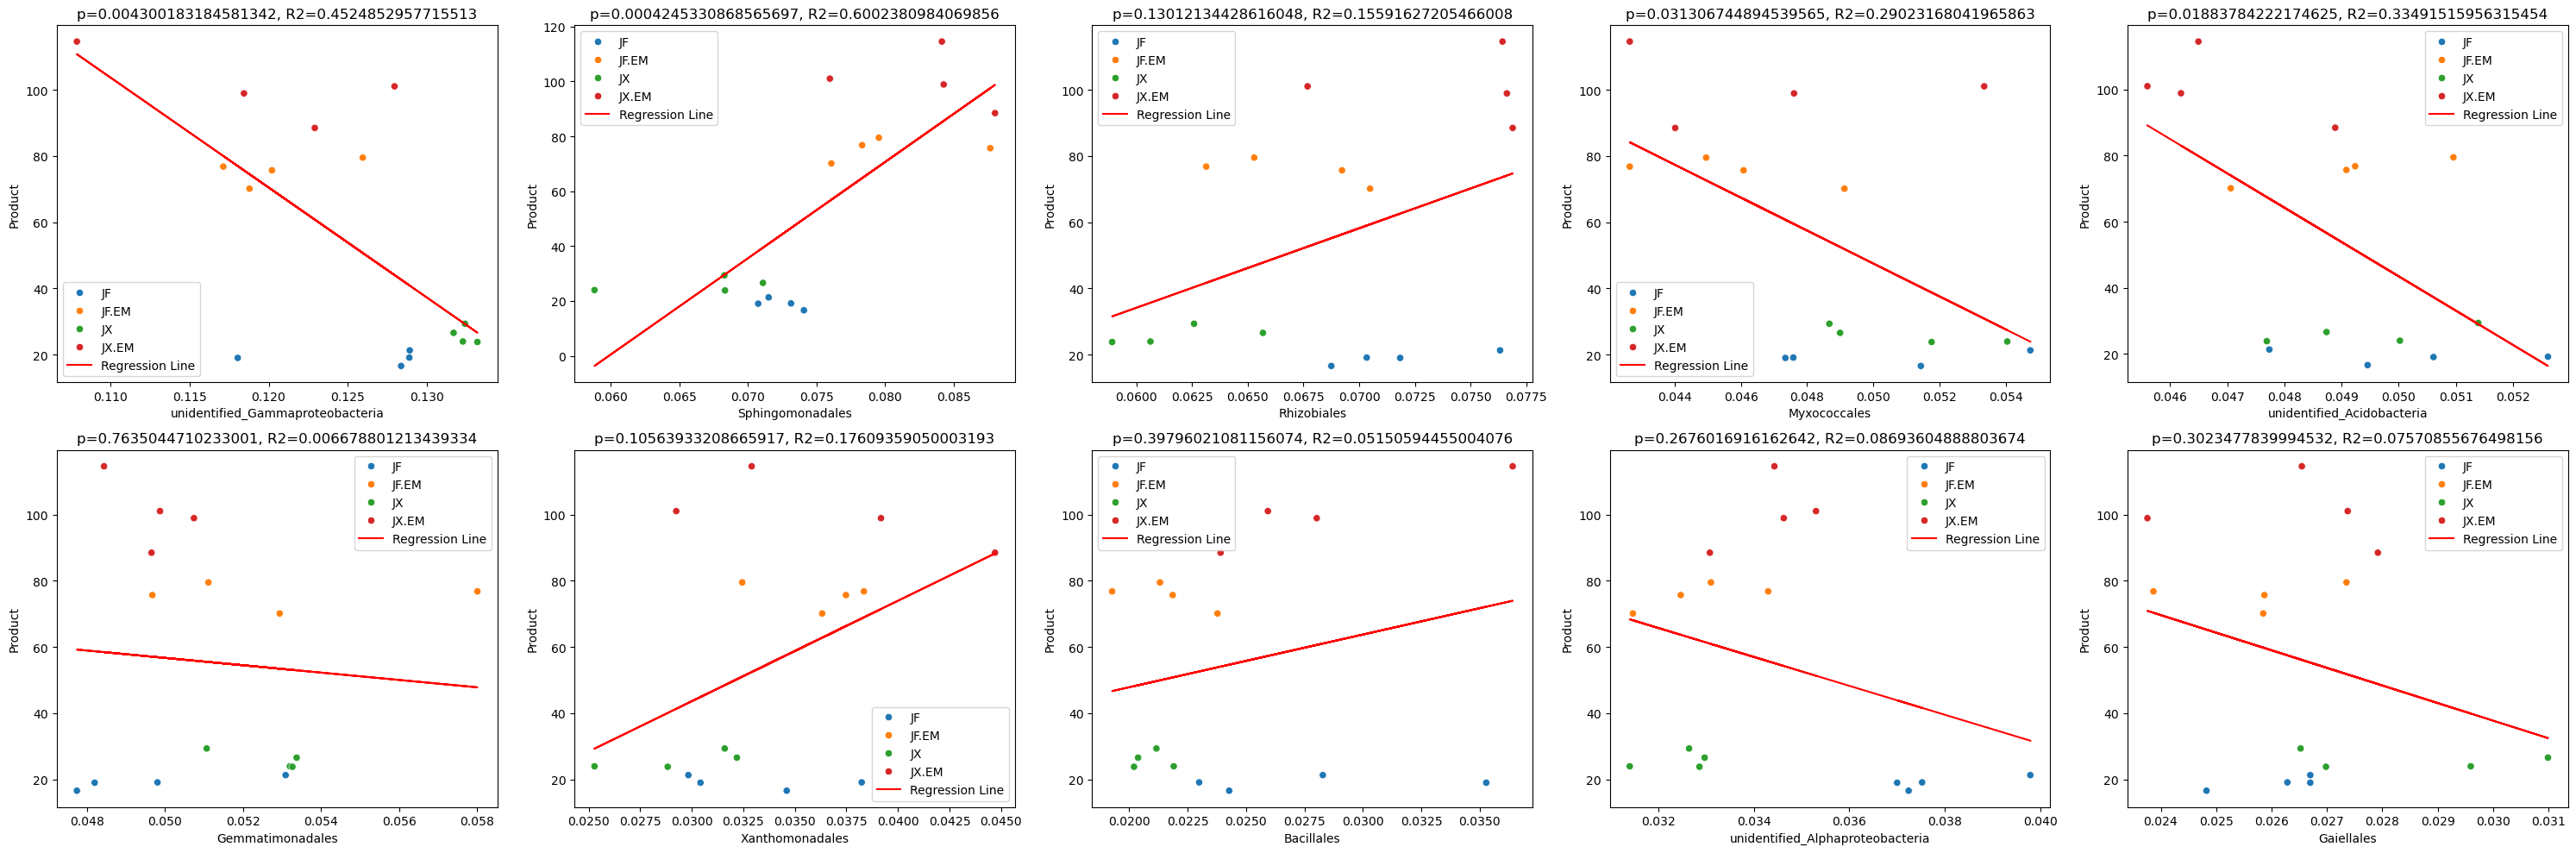

In [23]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

bac = total.columns[:10]

fig = plt.figure(figsize=(30, 10))
for ax_rec, bac_name in enumerate(bac):
    # 回归分析
    y, x = total['Product'], total[bac_name]

    # 创建线性回归模型并进行训练
    x = sm.add_constant(x)                  # 添加截距 y = kx + b
    model = sm.OLS(endog=y, exog=x).fit()   # endog：应变量，exog：自变量
    # print(model.summary())

    ax = plt.subplot(2,5,ax_rec+1)
    sns.scatterplot(data=total, x=bac_name, y='Product', hue='Group', ax=ax).set(title=f'p={model.pvalues[1]}, R2={model.rsquared}')
    ax.plot(total[bac_name], model.predict(x), color='red', label='Regression Line')
    ax.legend()
fig.tight_layout()

In [24]:
fig.savefig('reg_order.pdf', dpi=600)